# 2.7 Comparisons, Masks, and Boolean Logic

- Boolean: `true` or `false`
- Indexing: go through array

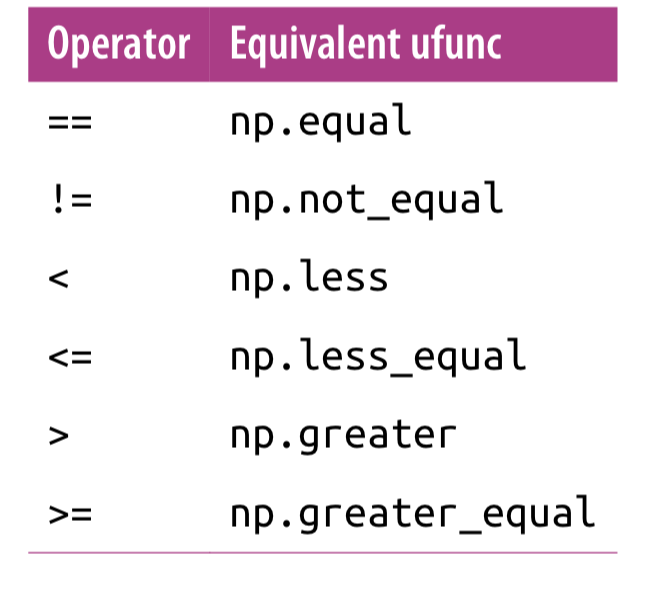

In [12]:
import numpy as np

In [28]:
# NOTE: the dimension (size) of the `name` and `height` must be the same
names = np.array(['Bob', # index = 0
                  'Alice', # index = 1
                  'Catherine', # index = 2
                  'David', # index = 3
                  'Ellen', # index = 4
                  'Frank', # index = 5
                  'John']) # index = 6
print("names", names)
height_arr = np.array([177, # index = 0  
                        170, # index = 1 
                        164, # index = 2 
                        151, # index = 3  
                        181, # index = 4 
                        159, # index = 5
                        179 # index = 6
                        ], dtype='int')
print("height_arr", height_arr)

names ['Bob' 'Alice' 'Catherine' 'David' 'Ellen' 'Frank' 'John']
height_arr [177 170 164 151 181 159 179]


### Boolean Masking

In [29]:
# find elements whose value is equal to David (i.e. name is David)
names == 'David'

array([False, False, False,  True, False, False, False])

In [30]:
# find elements whose value is larger than 160 (i.e. taller than 160 )
height_arr > 160 

array([ True,  True,  True, False,  True, False,  True])

In [31]:
# find total number of people whose height is taller than 160
# np.sum on Boolean array -> True = 1, False = 0
print("num taller than 160:", np.sum(height_arr > 160))

num taller than 160: 5


### Boolean Indexing

In [32]:
# find element whose index is equal to that of 'Ellen' in names np array (i.e. find Ellen's height)
height_arr[names == 'John'][0]

179

In [34]:
# find element whose index is equal to that of 'Alice' in names np array (i.e. find Alice's height)
height_arr[np.equal(names,  "Alice")][0]

170

In [26]:
# ambiguous: array with more than one element is not allowed
height_arr[names == 'Alice' or names == 'John'][0]

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

#### Example: Finding Class Average

In [35]:
# class A student scores => scores[0]
# class B student scores => scores[1]
# class C student scores => scores[2]
# class D student scores => scores[3]
classes = np.array(['A', 'B', 'C', 'D'])
scores = np.random.randint(0,100,[4,10])
print("class\n", classes)
print("scores\n", scores)

class
 ['A' 'B' 'C' 'D']
scores
 [[33 52 99 62 60 95 14  9 86 61]
 [ 2 96 52 56  8 25 83 81 28 38]
 [80 84 82 33 82 55 77 66 38 13]
 [91 79 26 12 97 59 28 59 51 29]]


#### We can filter out scores of class B only using boolean indexing

In [36]:
# find all scores of class B using boolean indexing
class_b_score = scores[classes == 'B']
class_b_score

array([[ 2, 96, 52, 56,  8, 25, 83, 81, 28, 38]])

In [37]:
# find average
print("Class B score average", np.mean(class_b_score))

Class B score average 46.9


In [38]:
# let's drop out class A and D
classes_after_dropped = classes[1:3]
scores_after_dropped = scores[1:3]

print("classes_after_dropped\n", classes_after_dropped)
print("scores_after_dropped\n", scores_after_dropped)

classes_after_dropped
 ['B' 'C']
scores_after_dropped
 [[ 2 96 52 56  8 25 83 81 28 38]
 [80 84 82 33 82 55 77 66 38 13]]


In [39]:
scores_after_dropped[classes_after_dropped == 'B']

array([[ 2, 96, 52, 56,  8, 25, 83, 81, 28, 38]])

#### We can also use boolean masking to find out how many students in class had passed the test.

In [42]:
print("total number of students who passed the test in Class B:", np.sum(class_b_score > 60))

total number of students who passed the test in Class B: 3


#### How to get students in each class who's test score is ranked 6?

In [43]:
scores

array([[33, 52, 99, 62, 60, 95, 14,  9, 86, 61],
       [ 2, 96, 52, 56,  8, 25, 83, 81, 28, 38],
       [80, 84, 82, 33, 82, 55, 77, 66, 38, 13],
       [91, 79, 26, 12, 97, 59, 28, 59, 51, 29]])

In [52]:
scores_sorted = np.sort(scores)[:, ::-1]
scores_sorted

array([[99, 95, 86, 62, 61, 60, 52, 33, 14,  9],
       [96, 83, 81, 56, 52, 38, 28, 25,  8,  2],
       [84, 82, 82, 80, 77, 66, 55, 38, 33, 13],
       [97, 91, 79, 59, 59, 51, 29, 28, 26, 12]])

In [57]:
# rank 6 => index = 5
scores_class_rank_6 = scores_sorted[:, 5]
scores_class_rank_6

array([60, 38, 66, 51])

In [61]:
# find the student who got highest score amongst those whose class rank is 6
print("highest:", np.max(scores_class_rank_6))
print("lowest:", np.min(scores_class_rank_6))
print("average", np.mean(scores_class_rank_6))

highest: 66
lowest: 38
average 53.75


In [64]:
class_b_score

array([[ 2, 96, 52, 56,  8, 25, 83, 81, 28, 38]])

In [63]:
# is there any student who got full mark in class B? (100)
np.any(class_b_score == 100)

False

In [69]:
# did all student pass in class C (> 60)?
scores_class_c = scores[classes == 'C']
scores_class_c

array([[80, 84, 82, 33, 82, 55, 77, 66, 38, 13]])

In [67]:
np.all(scores_class_c > 60)

False

In [71]:
# did everyone have nonzero scores (> 0) in class D?
scores_class_d = scores[classes == 'D']
scores_class_d


array([[91, 79, 26, 12, 97, 59, 28, 59, 51, 29]])

In [74]:
np.all(scores_class_c > 0)

True